84で得られた単語文脈行列に対して，主成分分析を適用し，単語の意味ベクトルを300次元に圧縮せよ．

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from sklearn.decomposition import TruncatedSVD

In [2]:
%%time
matrix_x = io.loadmat('084.matrix_x.mat')['x']

CPU times: user 3.63 ms, sys: 16 ms, total: 19.6 ms
Wall time: 34.5 ms


In [3]:
# 読込を確認
print('matrix_x Shape:', matrix_x.shape)
print('matrix_x Number of non-zero entries:', matrix_x.nnz)
print('matrix_x Format:', matrix_x.getformat())

matrix_x Shape: (388836, 388836)
matrix_x Number of non-zero entries: 447875
matrix_x Format: csc


In [4]:
%%time
# 次元圧縮
svd = TruncatedSVD(300)
matrix_x300 = svd.fit_transform(matrix_x)

CPU times: user 4min, sys: 1min 52s, total: 5min 53s
Wall time: 4min 20s


In [5]:
print(type(matrix_x300))
print('matrix_x300 Shape:',matrix_x300.shape)

<class 'numpy.ndarray'>
matrix_x300 Shape: (388836, 300)


Explained Variance Ratio Sum: 0.3194594211676983


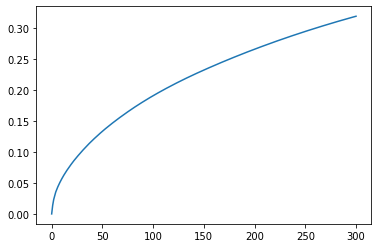

In [6]:
print('Explained Variance Ratio Sum:', svd.explained_variance_ratio_.sum())
ev_ratio = svd.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio)
plt.show()

In [7]:
%%time
# 返り値はndarrayなのでNumpy形式で保存(36.3s)
np.savez_compressed('085.matrix_x300.npz', matrix_x300)

# npy形式だと9.26s
# np.save('085.matrix_x300.npy', matrix_x300)

CPU times: user 14.7 s, sys: 175 ms, total: 14.8 s
Wall time: 14.9 s


In [8]:
%%time
print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000: #ここだけアレンジ
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|              matrix_x300| 933206512|
CPU times: user 1.58 ms, sys: 421 µs, total: 2 ms
Wall time: 1.7 ms
